## Problem Statement

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

## Importing the libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


## Uploading and reading the dataset

In [3]:
creditcard_df = pd.read_csv("marketing_data.csv")
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Here we can observe that the dataset contains 8950 observations and 18 variables

In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
## checking the summary of the dataset
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Obtain the feature of the customer who made maximum ONEOFF_PURCHASES

In [6]:
print(creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == creditcard_df['ONEOFF_PURCHASES'].max()])

    CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12  


#### Obtain the feature of Customer who made the maximum Cash Purchased Transaction? How many cash advance did he make.? How often did he paid his bill(frequency cash advnace)

In [7]:
print(creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()])

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12  


#### checking the missing values in the dataset

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Here we observe that variable Minimum_payment has 313 missing values and Credit_limit has 1

In [9]:
## Fill the missing values of Minimum_payments with its mean

creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
## Fill the missing values of Credit_limit with its mean

creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [11]:
## Checking the missing values

creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Lets check for data duplicacy

In [12]:
creditcard_df.duplicated().sum()

0

Dataset does not have duplicate entries

#### Column cust_id does not have impact in our analysis and is non numerical so we will remove it

In [13]:
creditcard_df.drop('CUST_ID',axis = 1,inplace = True)

In [14]:
## Lets check the columns of the dataset

creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## Data Visualisation

kdeplot represents Kernal Density Estimate It is usedfor visualising Probability Density of a continous variable. KDE demostrates the probability density at different values in a continuous variable.

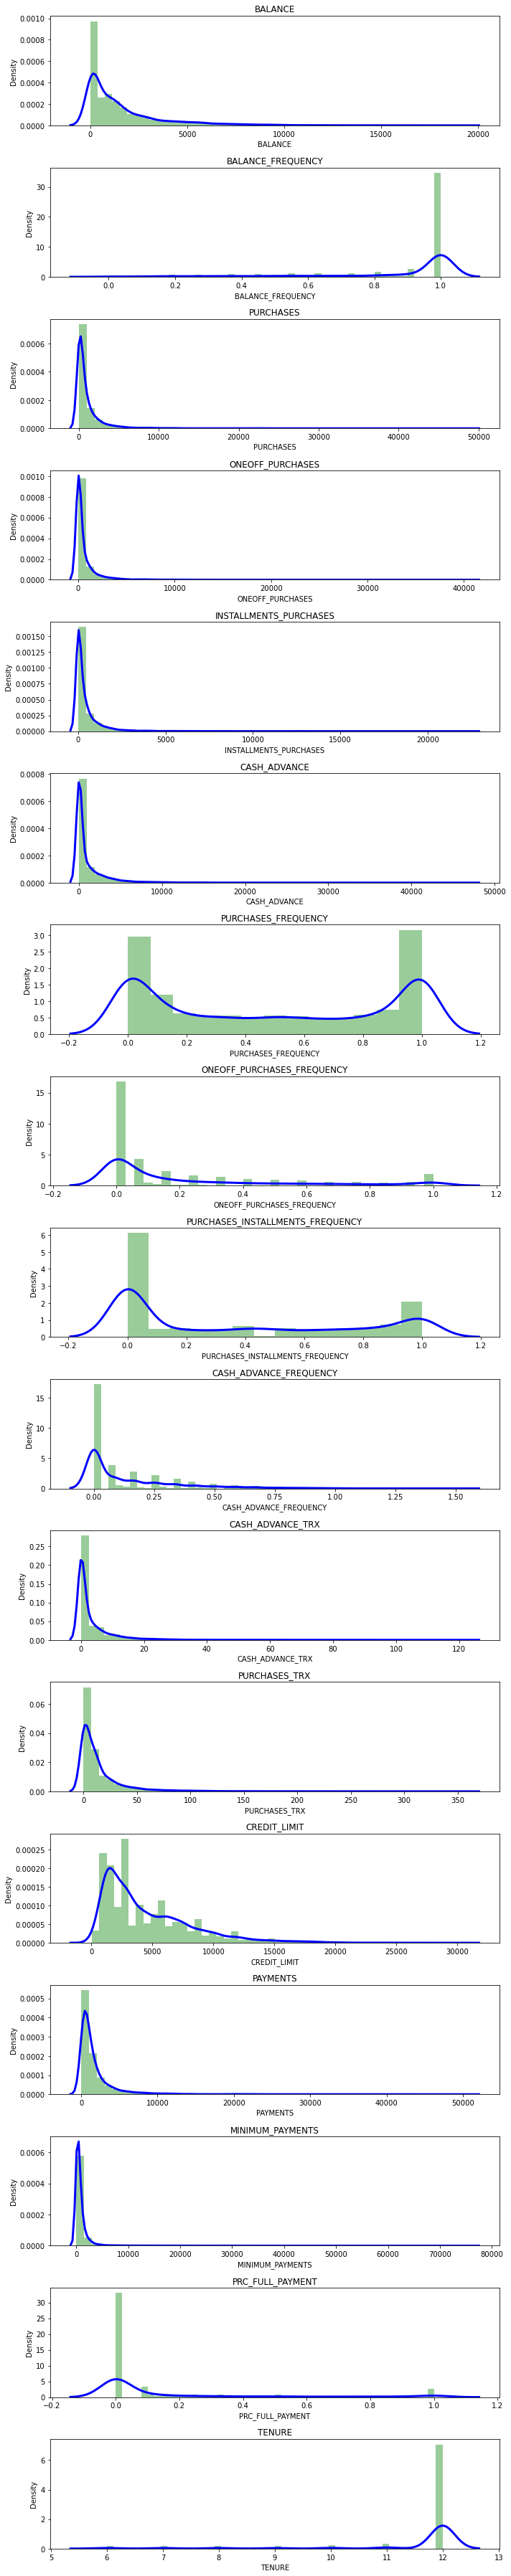

In [17]:
plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color":'b', "lw":3, "label":"KDE"},hist_kws = {"color":'g'})
  plt.title(creditcard_df.columns[i])
plt.tight_layout()

Facts for above graph:

1)Mean Balance of the first graph is calculated as $1500
2)Balance Frequency - Most cutomers update their balance frequently.
3)Purchase_Frequency - There are two types of customers..0/1
4)PRC_FULL_PAYEMENT - Most of the customers don't psy their balance in full.
5)Tenure - Most of the customers are 11 or more years old.

#### Lets plot corelation matrix between different features

<AxesSubplot:>

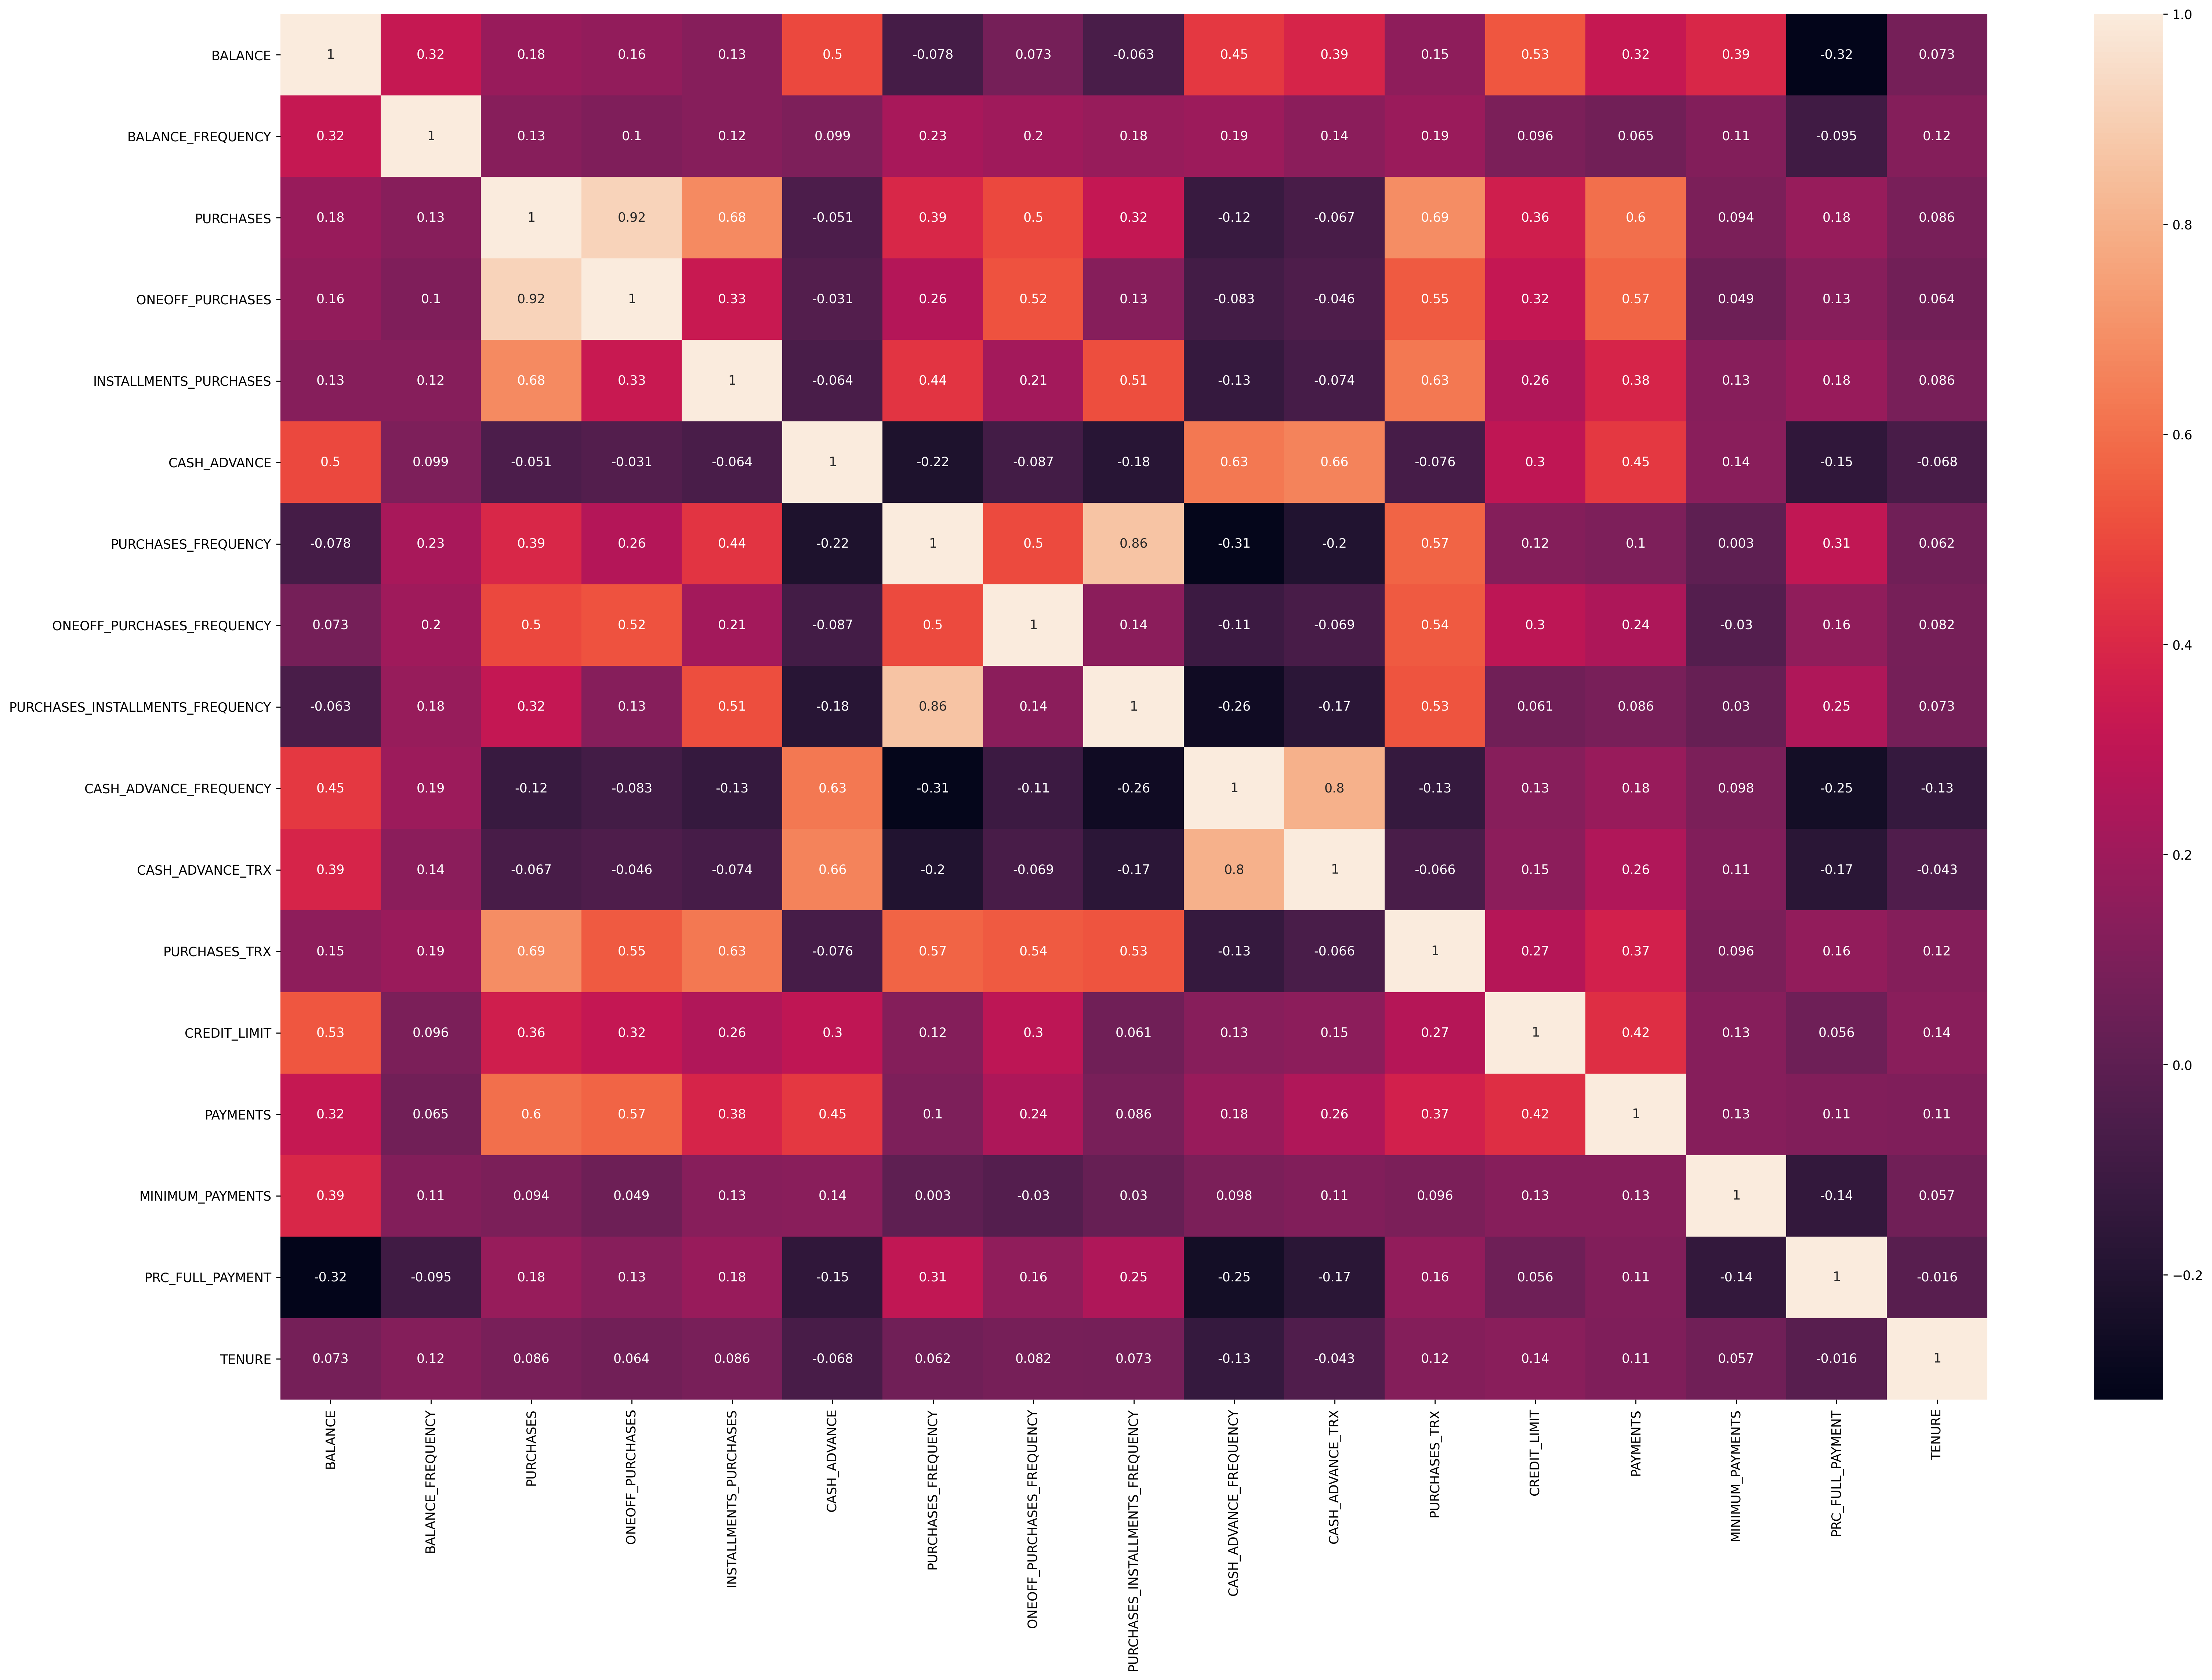

In [20]:
correlations = creditcard_df.corr()
f,ax = plt.subplots(figsize = (30,20),dpi=250)
sns.heatmap(correlations, annot = True)

#### Lets standardise the data using standardscaler method

In [22]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### Elbow method 
It uses within cluster sum of squares to find the optimum number of clusters 

Inertia_ : sum of squared distance of samples to their closest cluster center.

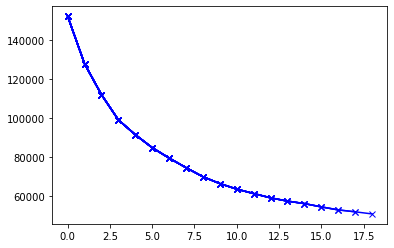

In [23]:
value_1 = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i) 
  kmeans.fit(creditcard_df_scaled)
  value_1.append(kmeans.inertia_) 
  plt.plot(value_1,'bx-')

The slope is gradually changing after points 7.5. So we could take k as 7 or 8 or 9 maybe.

Obtain the value of k for 7 columns

In [24]:
creditcard_df_scaled[:,:7].shape

(8950, 7)

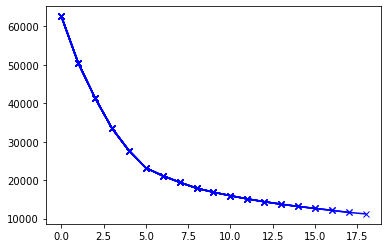

In [25]:
value_1 = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i) 
  kmeans.fit(creditcard_df_scaled[:,:7])
  value_1.append(kmeans.inertia_) 
  plt.plot(value_1,'bx-')

The k value can be 5 for the 7 columns

### Applying K-Means clustering algorithm

In [26]:
kmeans = KMeans(7)
#k = 7
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [27]:
kmeans.cluster_centers_.shape
#Gives centroid for all different clusters

(7, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers
#this gives the centroid for all the different columns for 7 clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701966,-2.129702,-0.306937,-0.230466,-0.302228,-0.323561,-0.546545,-0.427057,-0.441465,-0.522763,-0.377149,-0.416244,-0.172926,-0.202648,-0.257786,0.295386,0.200063
1,0.134333,0.430033,0.948356,0.900843,0.587352,-0.306459,1.094244,1.869649,0.537783,-0.408424,-0.318093,1.210681,0.708890,0.395800,-0.033465,0.459704,0.307642
2,1.684627,0.395302,-0.198154,-0.145959,-0.200469,2.004702,-0.445204,-0.182041,-0.394450,1.917279,1.935792,-0.231219,1.022615,0.844109,0.560031,-0.391023,0.068391
3,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
4,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341
5,-0.369896,0.332654,-0.041641,-0.231558,0.326783,-0.369242,0.972905,-0.349055,1.162389,-0.478633,-0.363579,0.167108,-0.277428,-0.224322,-0.030961,0.297820,0.252536
6,0.012962,0.402617,-0.345631,-0.226418,-0.401160,-0.096369,-0.818374,-0.339723,-0.758994,0.095898,-0.032737,-0.467337,-0.299954,-0.244810,-0.013918,-0.452457,0.272288


#### Scaling data back to original values as calculation is done on transformed values.

In [29]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers
#This table is showing the centroids of each of the 7 clusters and its all features as the original value.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,103.391285,0.372764,347.429370,209.911679,137.766893,300.348988,0.270996,0.075058,0.188988,0.030534,0.675063,4.363560,3865.272413,1146.496499,263.446205,0.240110,11.785055
1,1844.078175,0.979142,3029.382019,2087.652366,942.202839,336.211639,0.929523,0.760210,0.578166,0.053414,1.078076,44.802839,7073.680814,2878.947303,786.217751,0.288170,11.929022
2,5070.884449,0.970914,579.845896,350.174887,229.786281,5182.824406,0.311669,0.148151,0.207673,0.518811,16.459184,8.962585,8215.141208,4176.757089,2169.335886,0.039347,11.608844
3,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
4,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
5,794.568411,0.956073,914.238853,208.098059,706.573166,204.554156,0.880824,0.098328,0.826400,0.039365,0.767667,18.863504,3485.053341,1083.753304,792.054158,0.240822,11.855276
6,1591.453653,0.972647,264.758972,216.629898,48.303821,776.781018,0.161898,0.101112,0.062794,0.154334,3.025424,3.093573,3403.095574,1024.442951,831.770717,0.021379,11.881709


All the 7 clusters can be divided into 4 segments of customers

### First Customers Cluster(Transactor)(0):

#### Paid least amount of interest charges
#### Careful with their money
#### Lowest Balance(103)
#### Cash Advance(300)
#### Percent of full payement = 24%

### Second Customers Cluster(Revolvers)(2):

#### see credit card as loan
#### Most Lucrative sector
#### Highest Balance(5070)
#### Highest Cash Advance(5182)
#### Low purchase frequency
#### High cash advanace frequency(51)
#### High advance cash transactions(16)

### Third Cluster(VIP/Prime)(4):

#### High credit limit(12395)
#### High percentage of full payment(39%)

### Fourth Customers Cluster(Low Tenure)(3):

#### Low Tenure(7)
#### Low Balance(866)

In [31]:
## lets categorize each custmers into these clusters.
#y_kmeans will have the value of the predicted cluster for each customer.

y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([6, 5, 4, ..., 3, 3, 3])

In [32]:
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({"Cluster":labels})],axis = 1)
creditcard_df_cluster
#The last column is giving the predicted value of customer cluster.
#Or gives the cluster to which it belongs.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


### Plotting histogram for various clusters.

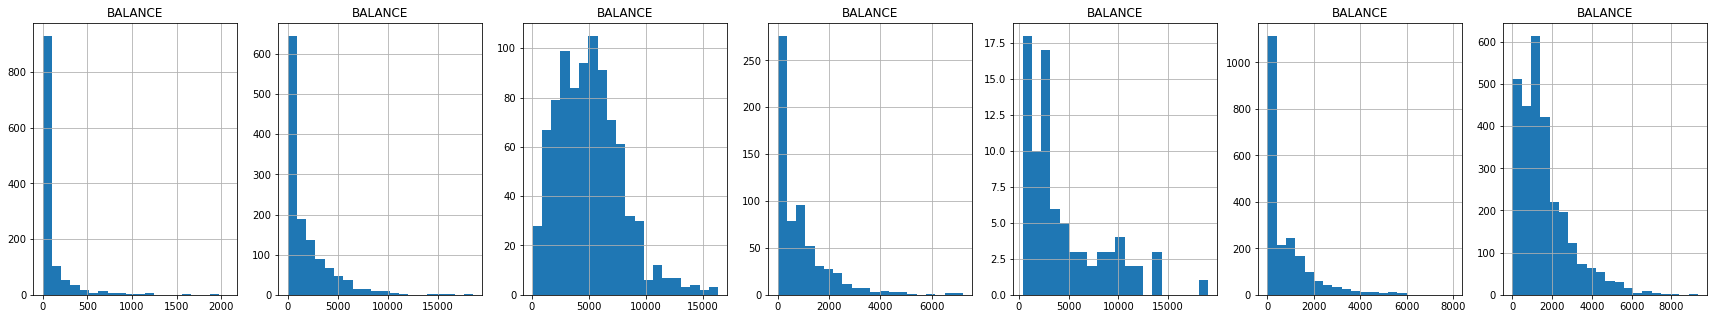

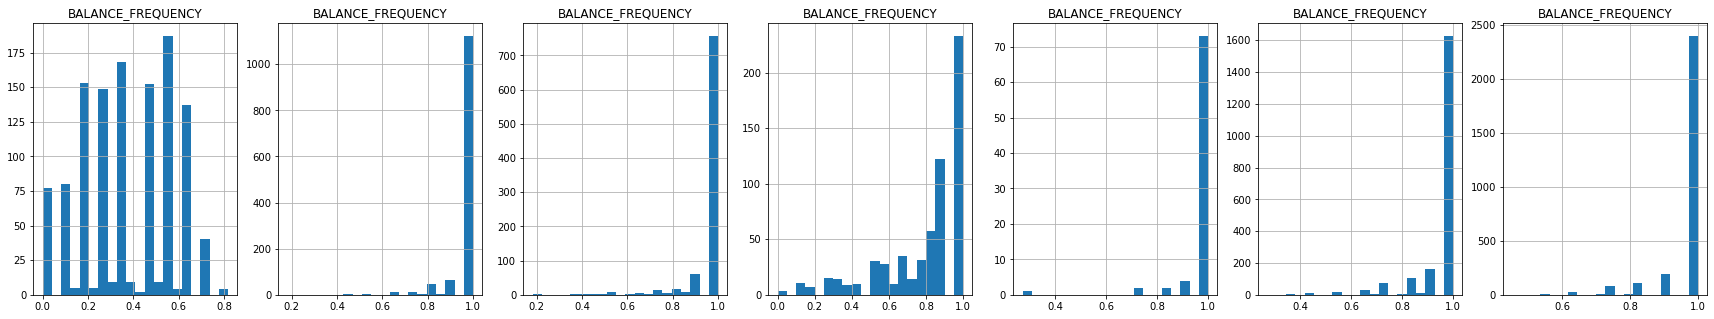

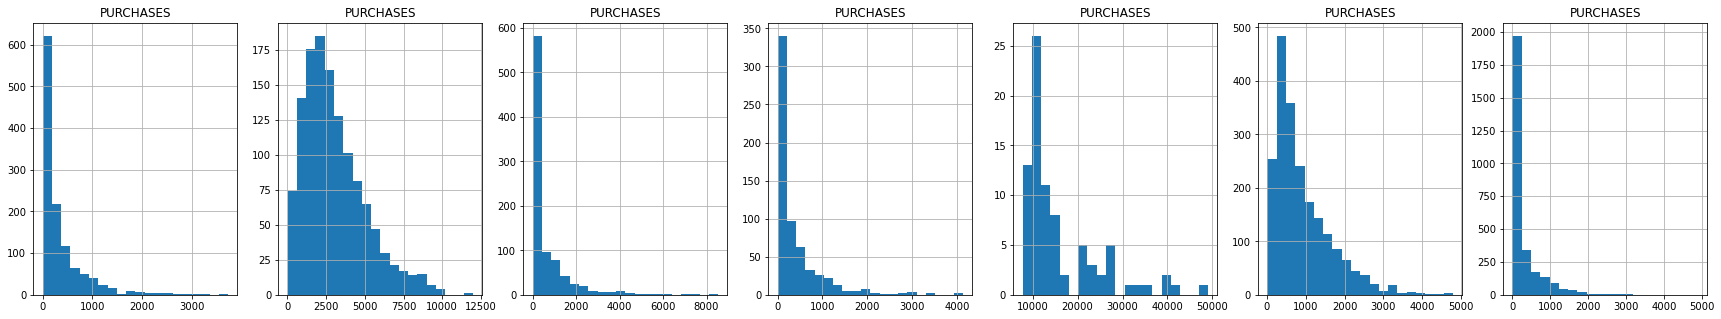

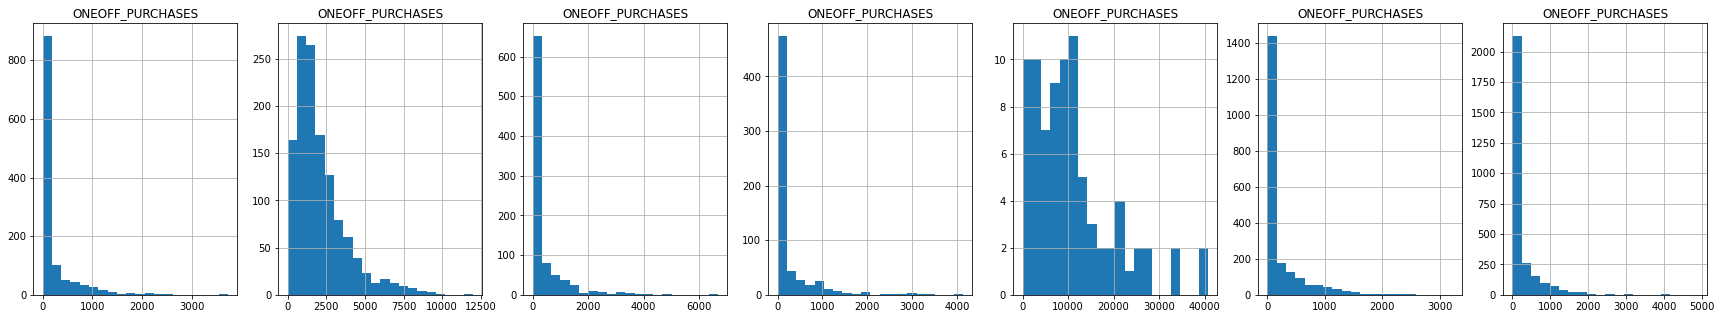

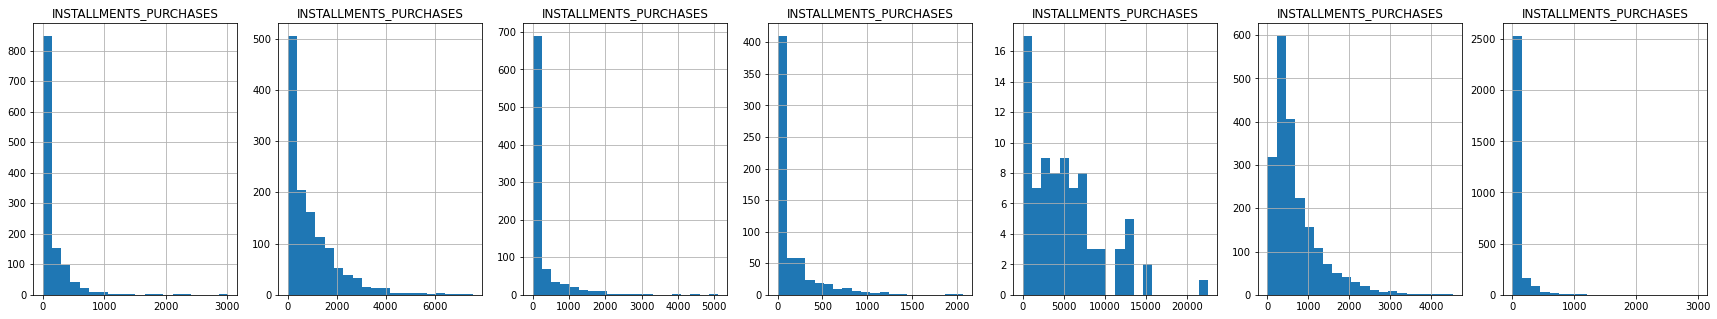

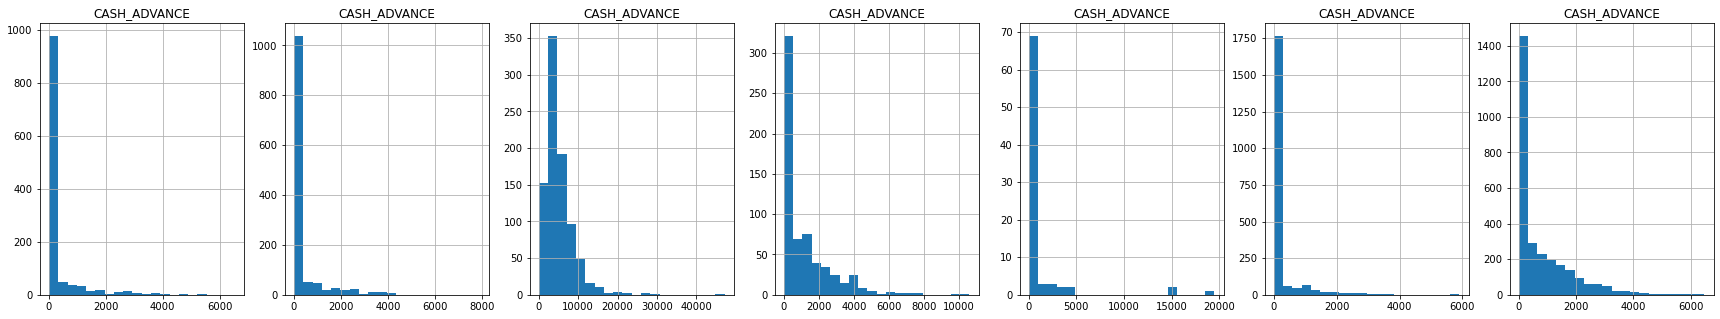

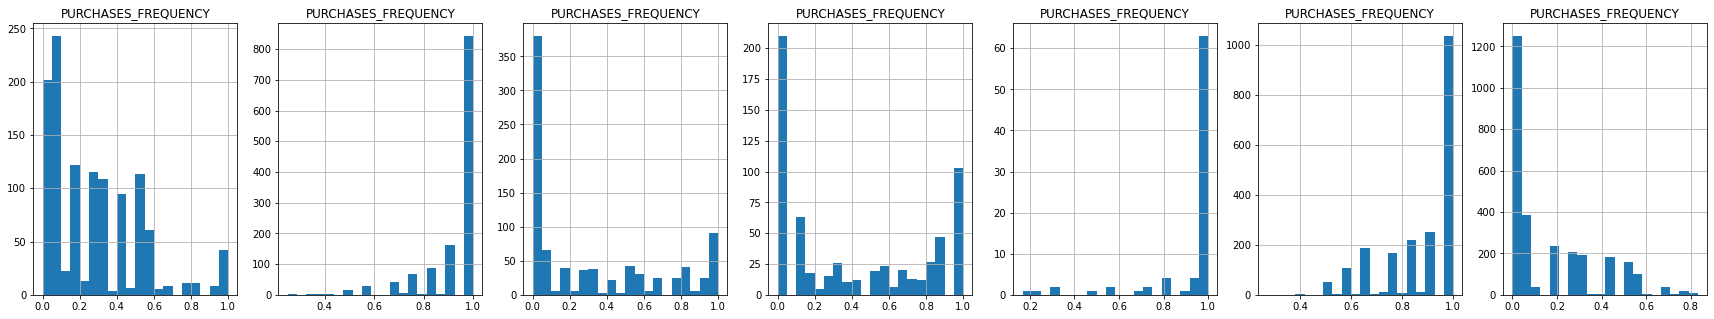

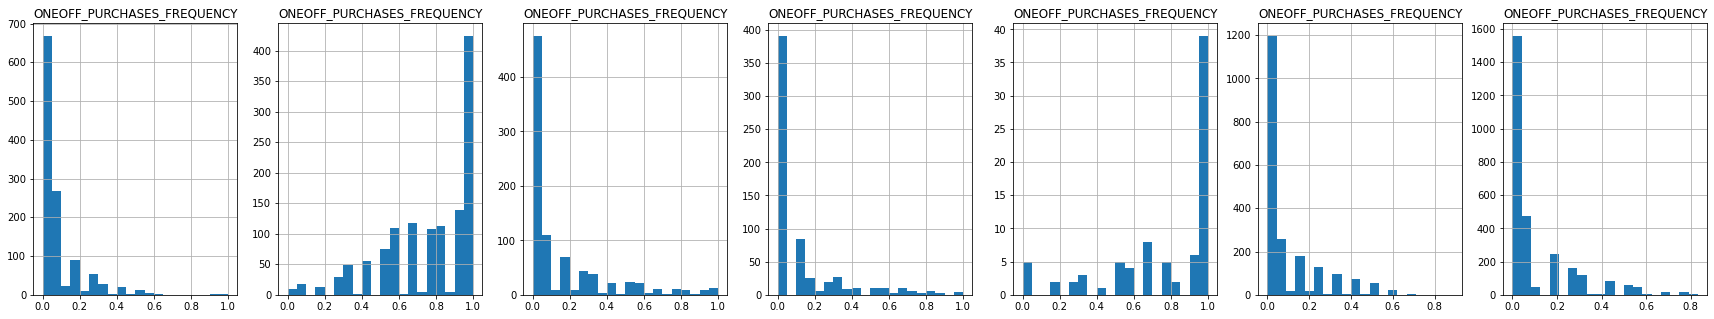

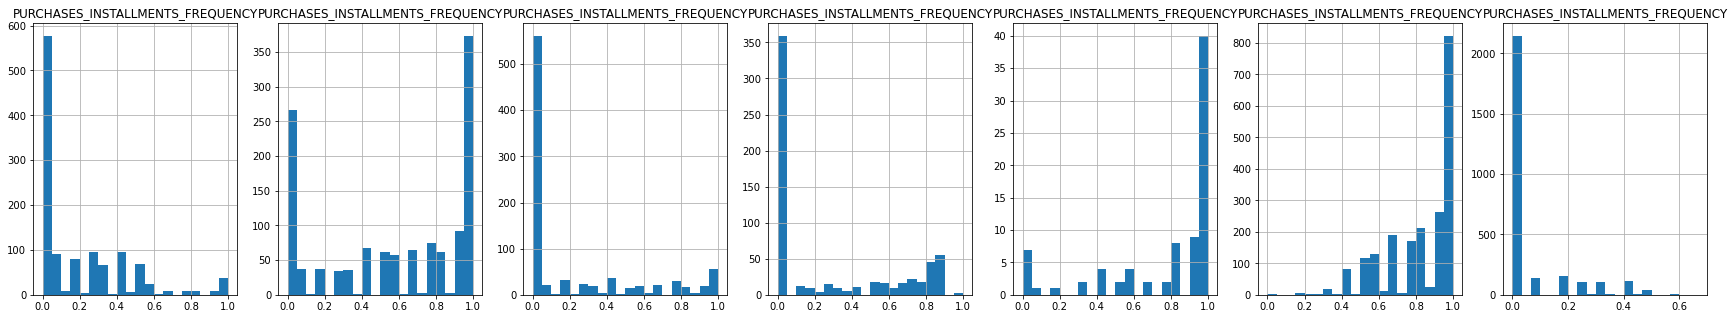

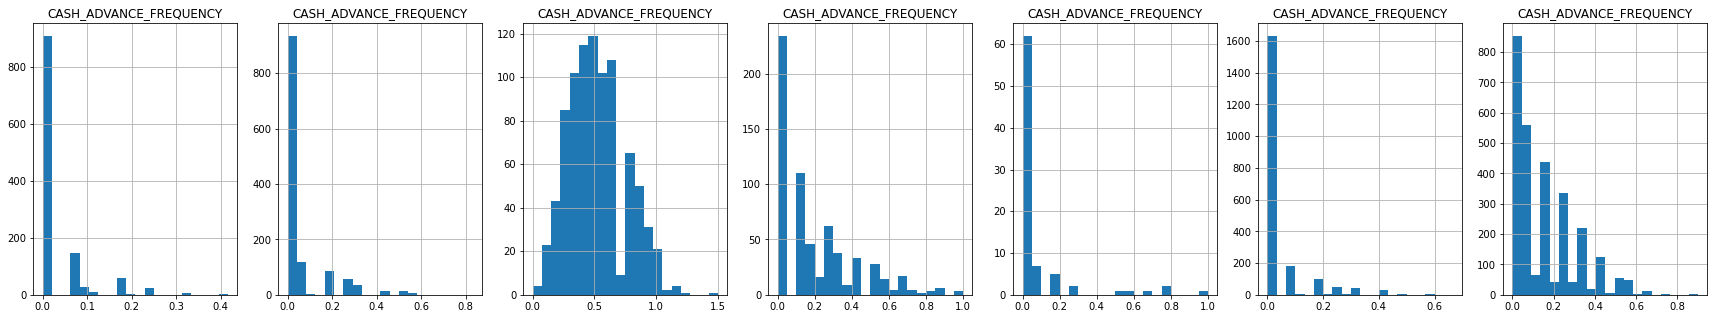

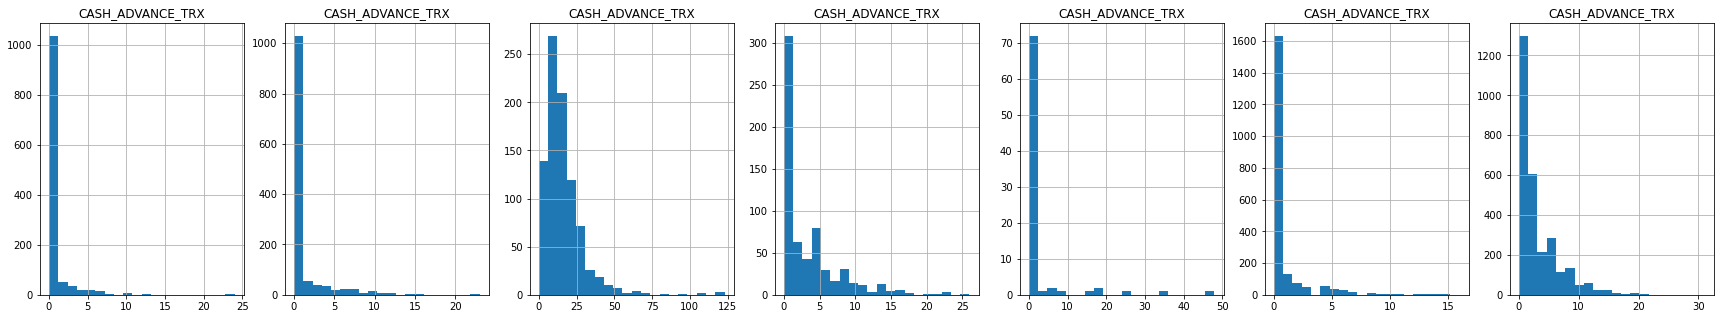

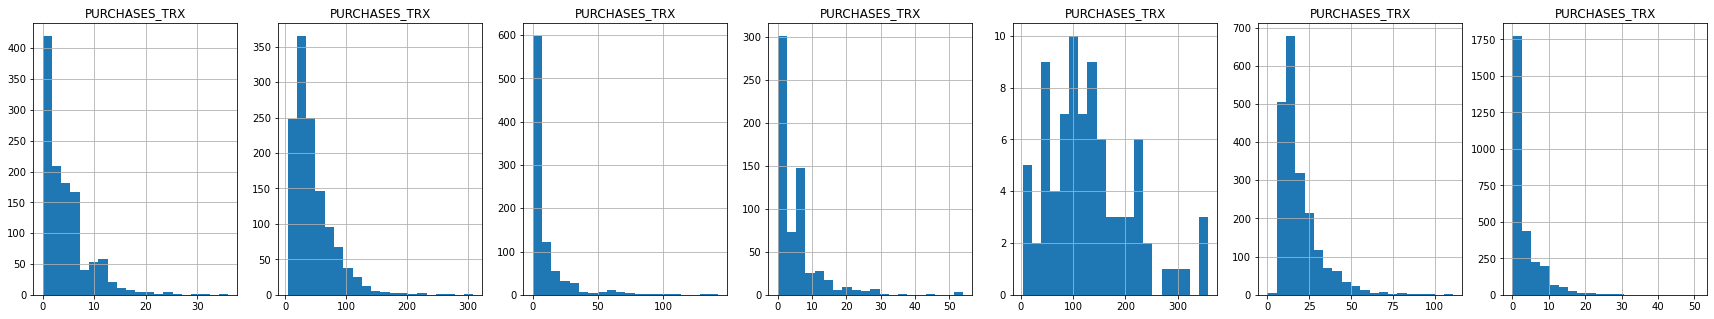

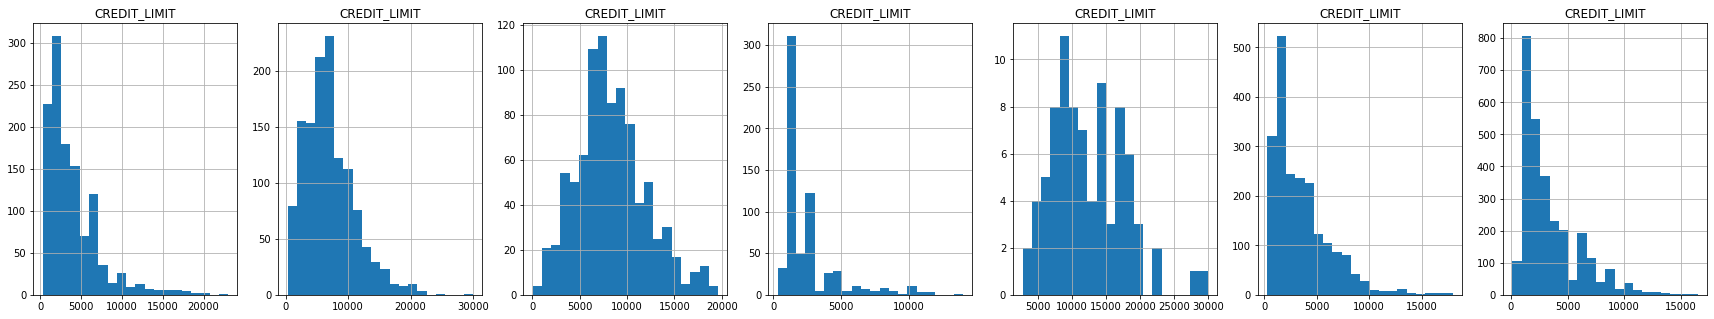

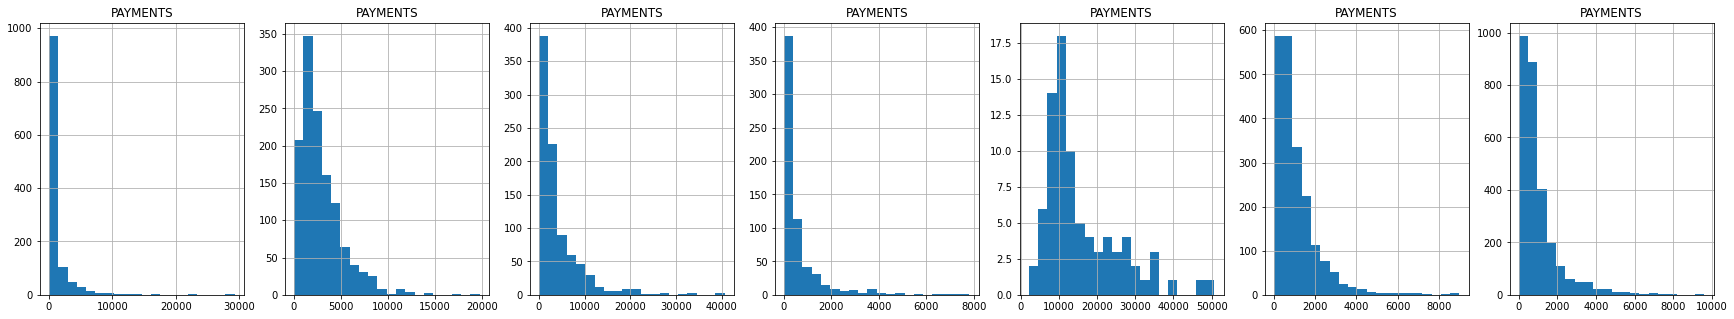

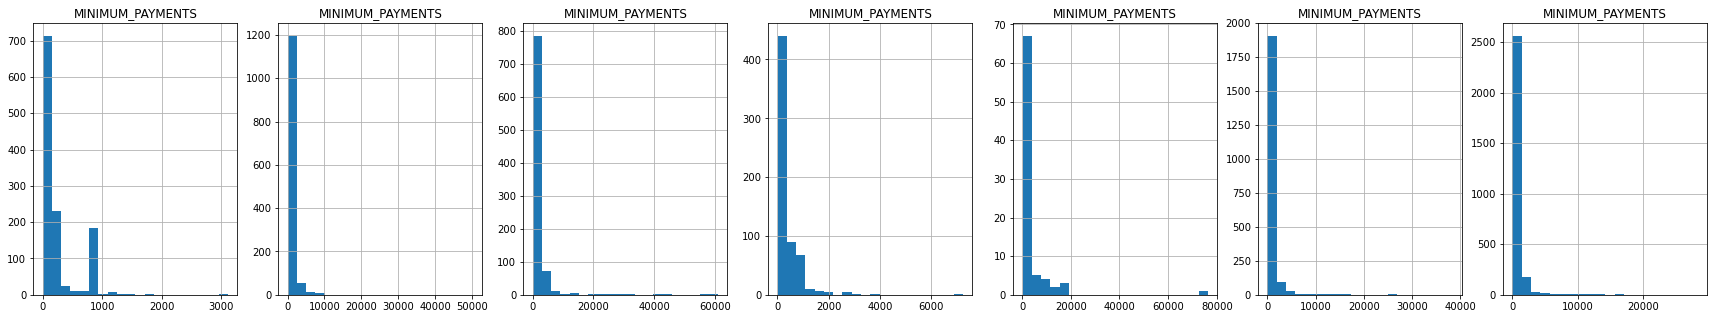

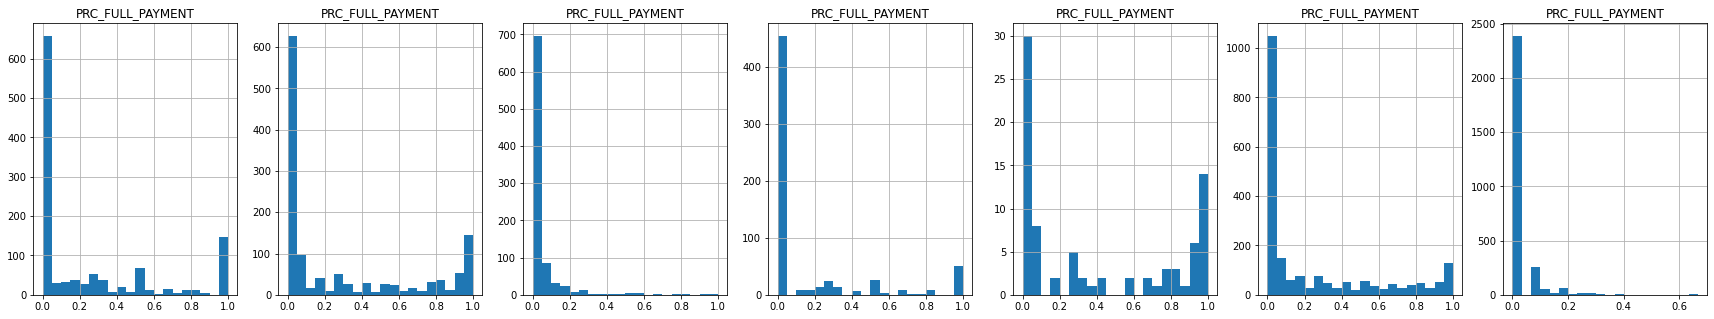

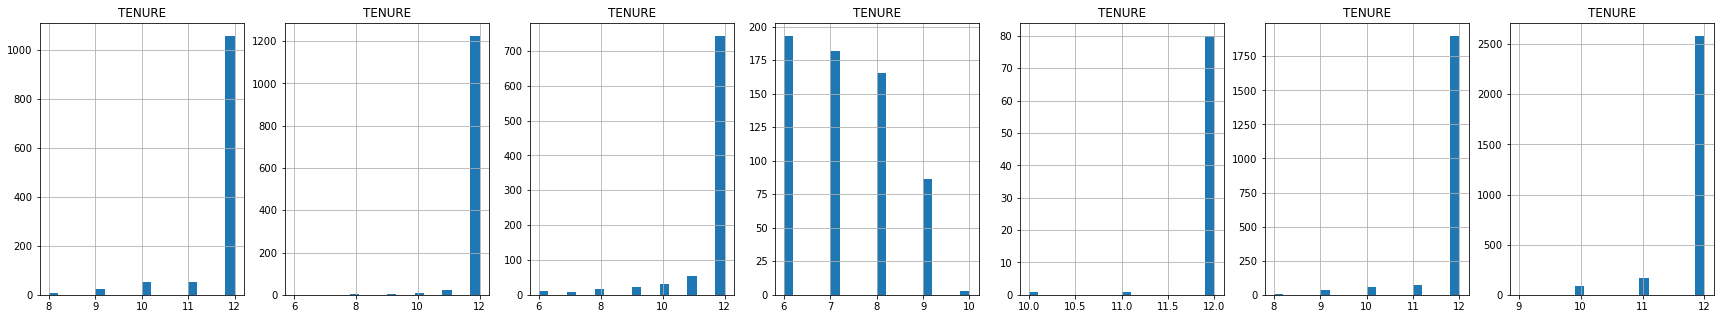

In [33]:
for i in creditcard_df.columns:
  #To select all the columns of the data frame
  plt.figure(figsize = (30,5))
  #The next loop is to show plot for each 7 clusters
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['Cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(i)
plt.show()

### Principal Component Analysis

In [34]:
#Obtain principal components on our dataset:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221859, -1.07645442],
       [-1.1382941 ,  2.50647472],
       [ 0.96968633, -0.38351519],
       ...,
       [-0.92620206, -1.8107902 ],
       [-2.33655196, -0.65797058],
       [-0.55642602, -0.40045889]])

In [35]:
#Dataframe with 2 components:
pca_df = pd.DataFrame(data = principal_comp,columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076454
1,-1.138294,2.506475
2,0.969686,-0.383515
3,-0.873624,0.043159
4,-1.599433,-0.688583


In [36]:
#Concatenation Cluster label to the Dataframe:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)
pca_df.head()

,pca1,pca2,Cluster
0,-1.682219,-1.076454,6
1,-1.138294,2.506475,2
2,0.969686,-0.383515,1
3,-0.873624,0.043159,6
4,-1.599433,-0.688583,6


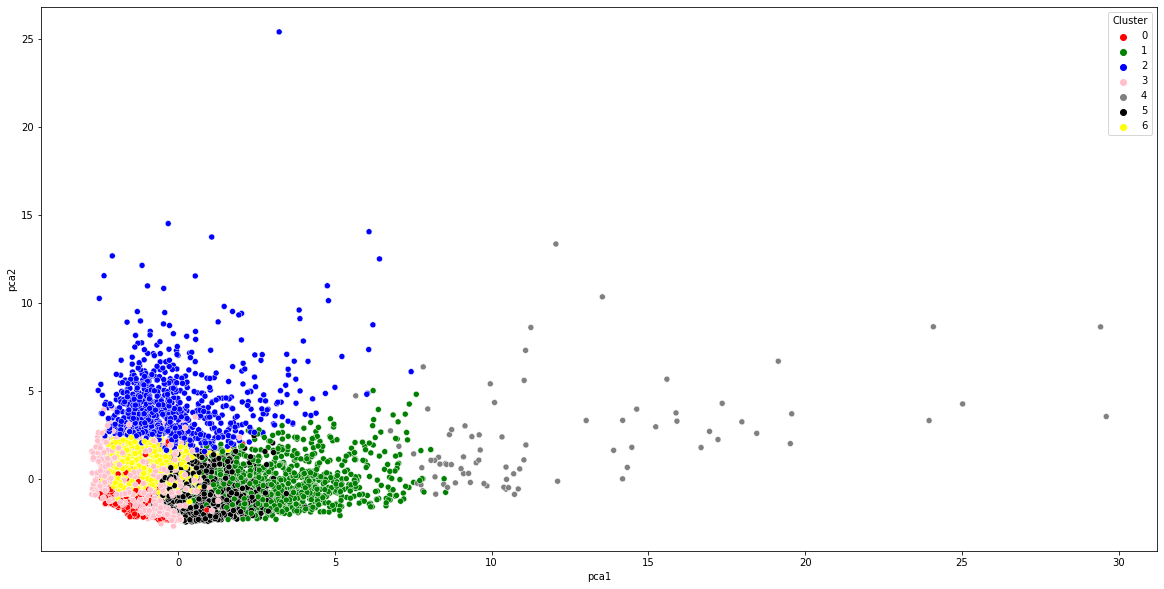

In [37]:
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_df,palette = ['red','green','blue','pink','grey','black','yellow'])
plt.show()

### Our customers in specific clusters can be visualised by following colors.

#### Transacter - Green
#### Revolver - Pink
#### Vip - Yellow
#### Low Tenure - Blue